Unstructured Partition 3가지 타입
1. auto
2. fast
3. hi-res
4. OCR-only

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

import fitz
import io
from PIL import Image, ImageDraw
from unstructured.partition.auto import partition

### PDF 파일 불러오기

In [55]:
file_path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Word_docs_sampling.pdf'

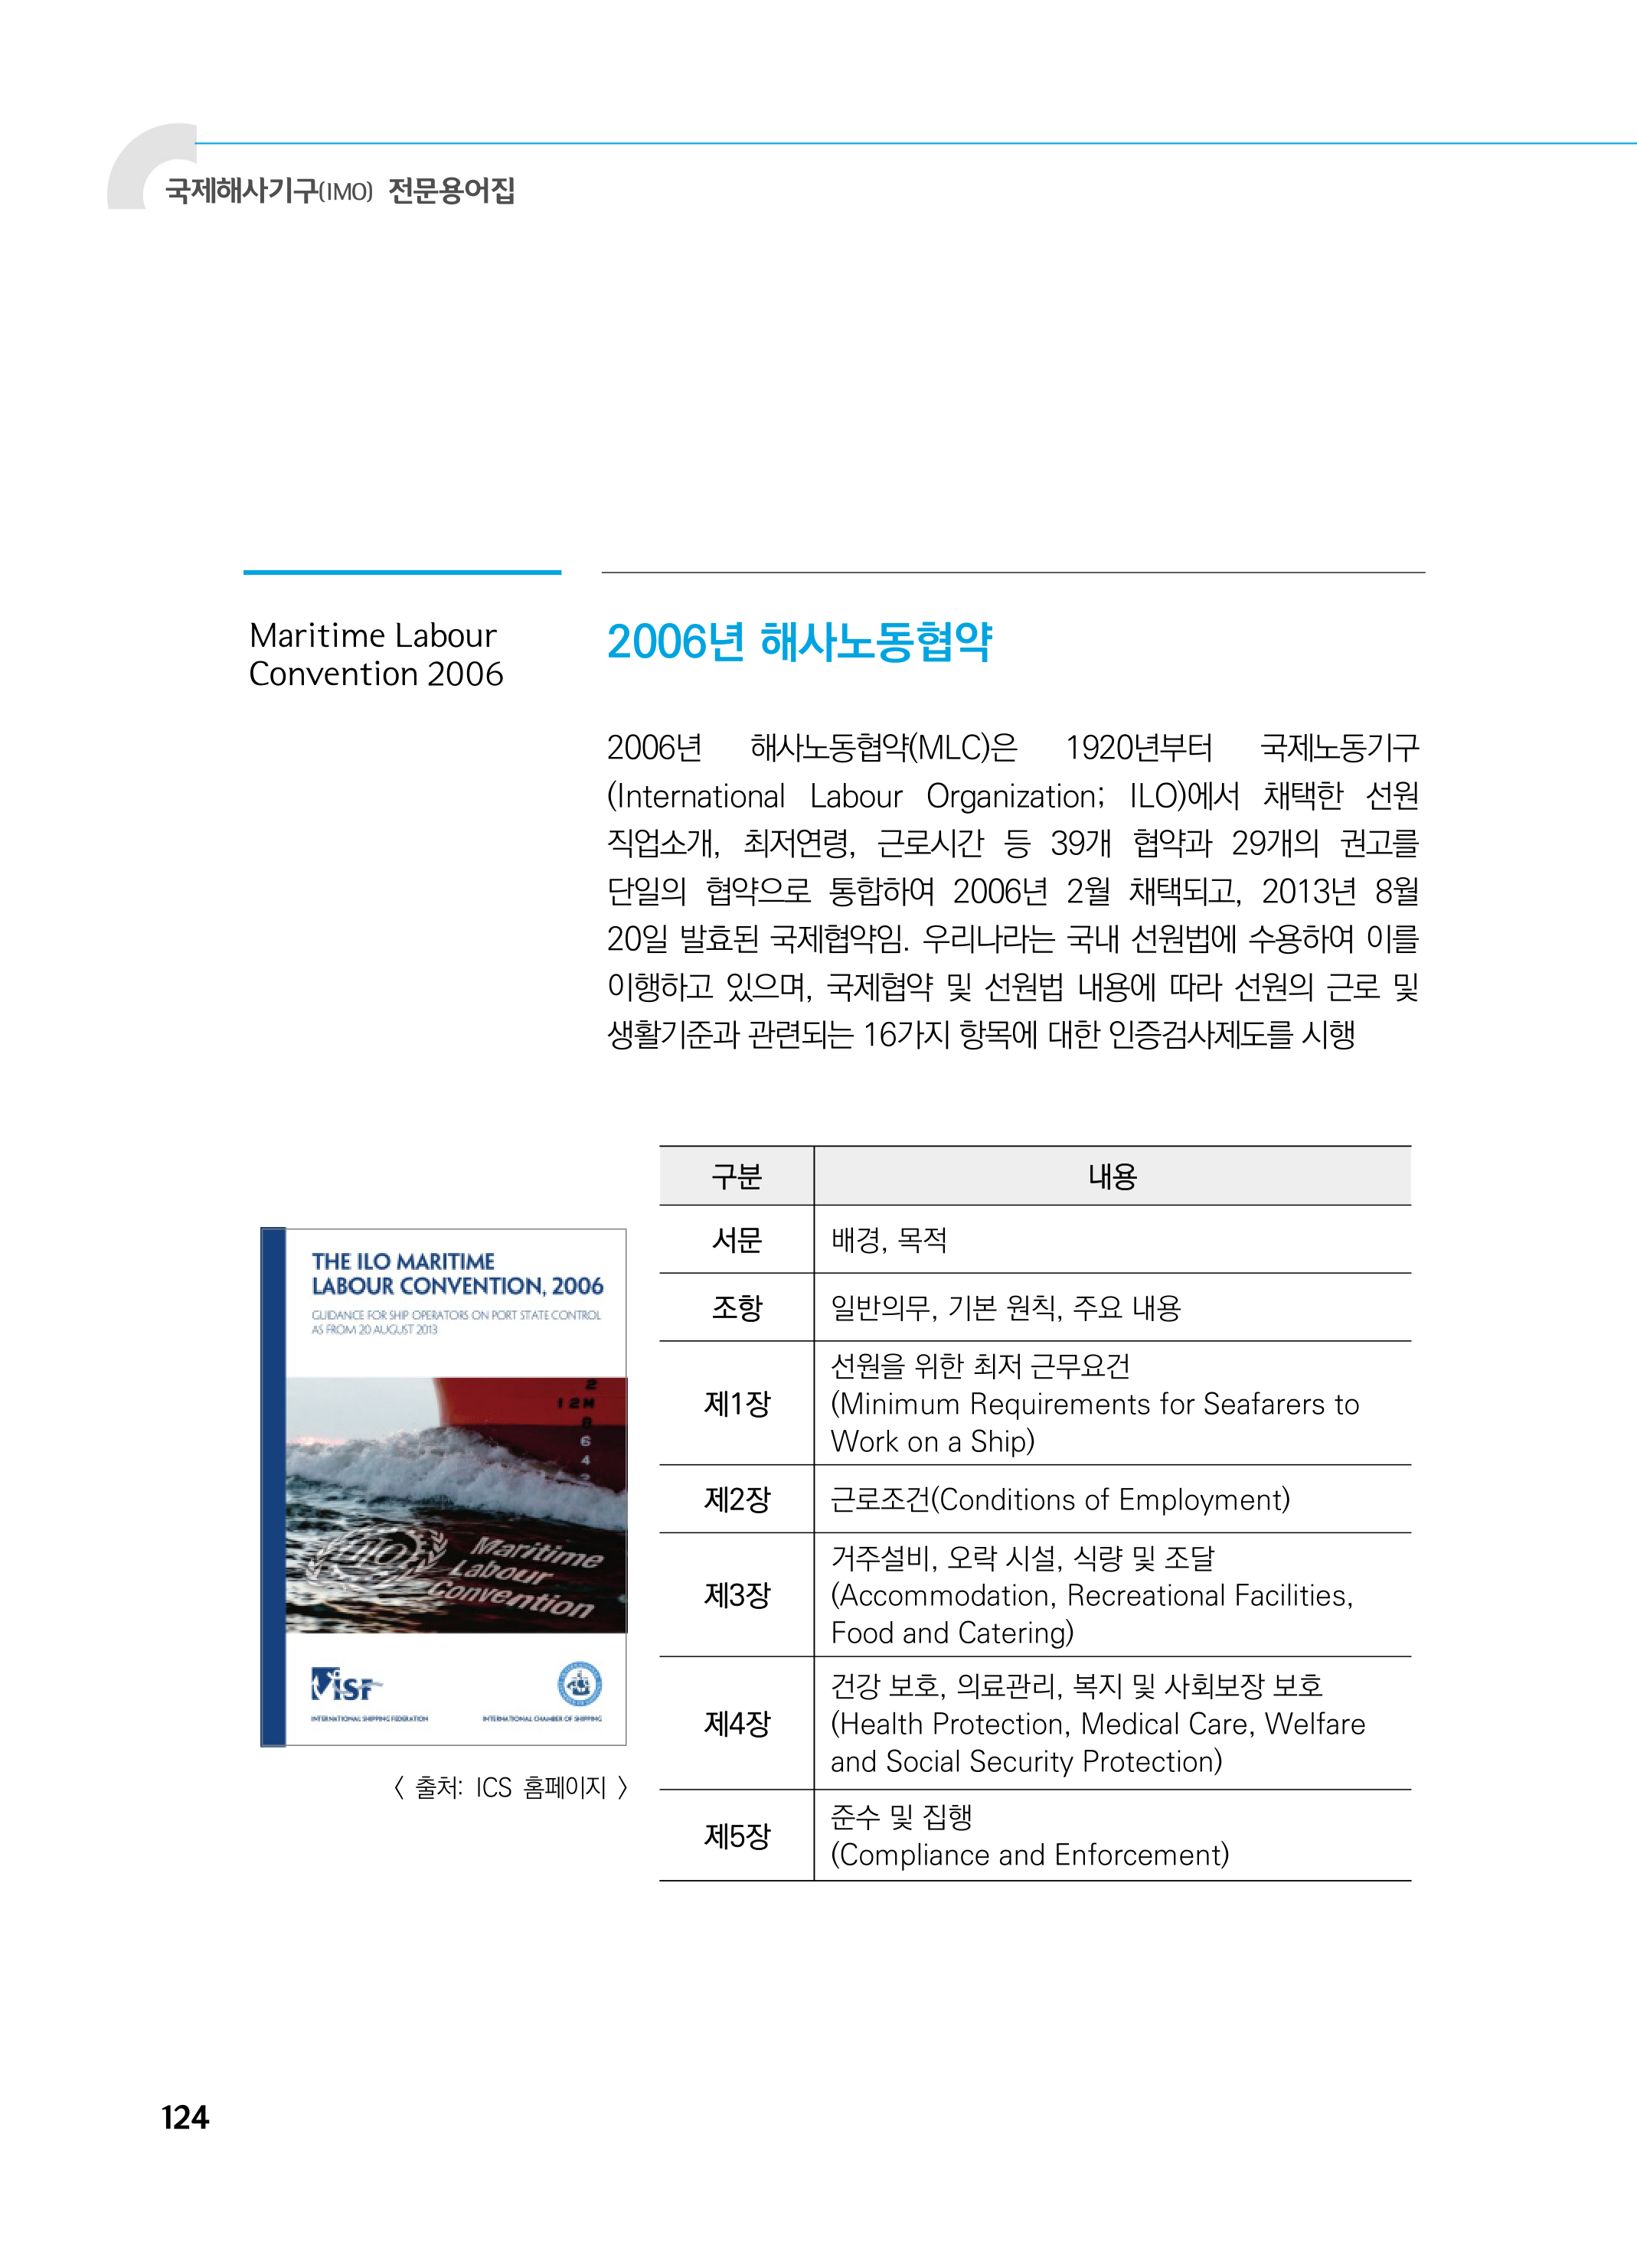

In [65]:
# PyMuPDF로 PDF 이미지 변경
doc = fitz.open(file_path)
page = doc.load_page(0)
pix = page.get_pixmap(dpi=300)
img = Image.open(io.BytesIO(pix.tobytes()))
img

In [31]:
# 세부적으로 파티션을 나누는 과정
def process_draw_box(page, elements):
    for element in elements:
        copy_page = page.copy()
        draw = ImageDraw.Draw(copy_page)

        coords = element.metadata.coordinates.points
        top_left = coords[0]
        bottom_right = coords[2]
        draw.rectangle((top_left, bottom_right), outline="red", width=6)

        plt.imshow(copy_page)
        plt.axis('off')
        plt.show()

### Auto로 파티션

In [59]:
# pdf 경로로 파티션 진행
auto_elements = partition(
    filename=file_path,
    strategy="auto",
    languages=['kor', 'eng']
)
print(len(auto_elements))

22


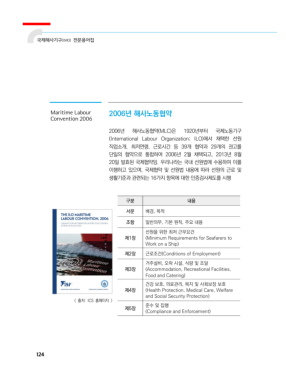

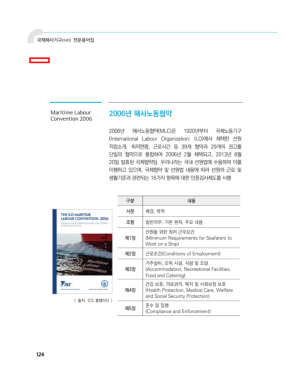

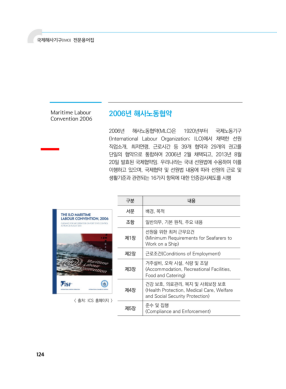

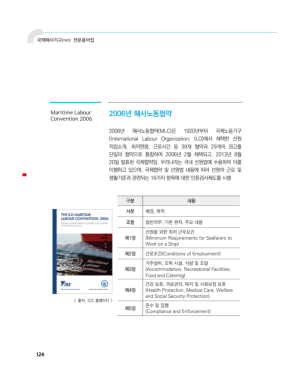

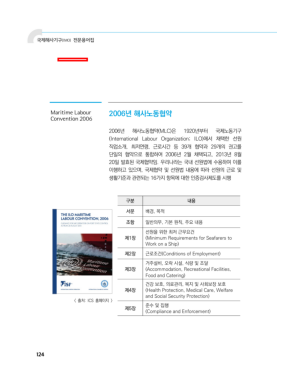

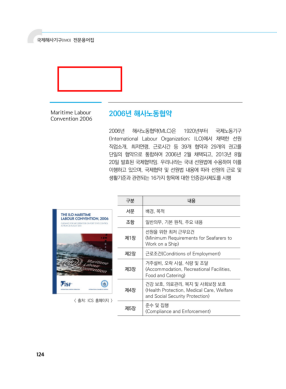

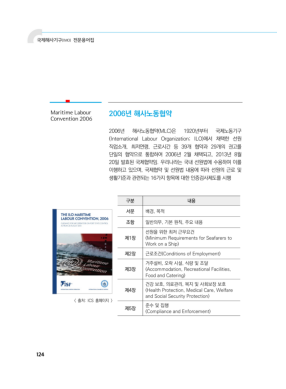

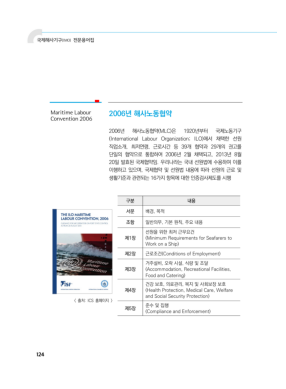

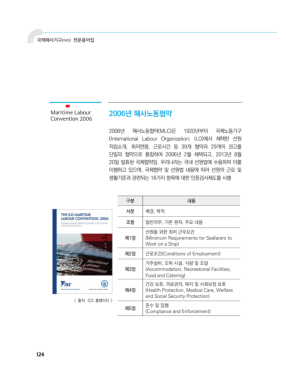

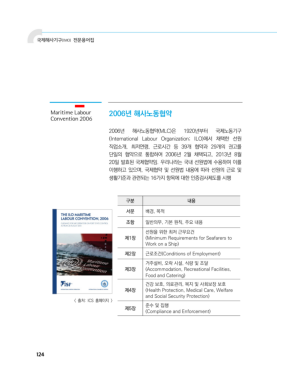

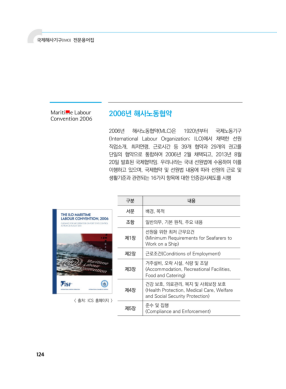

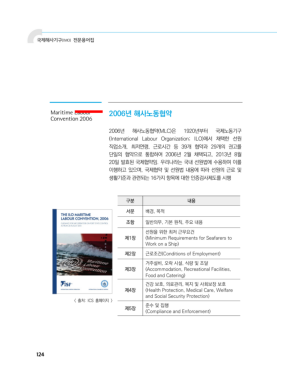

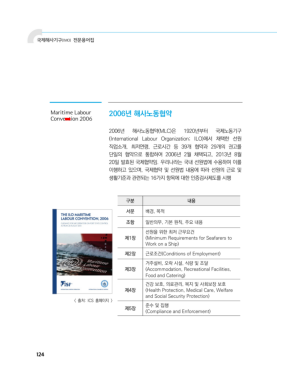

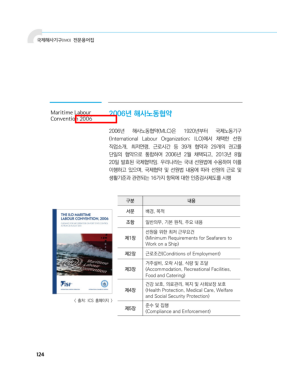

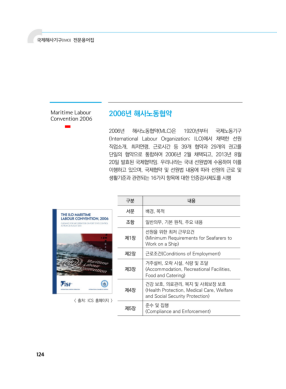

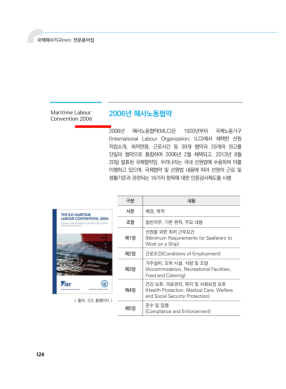

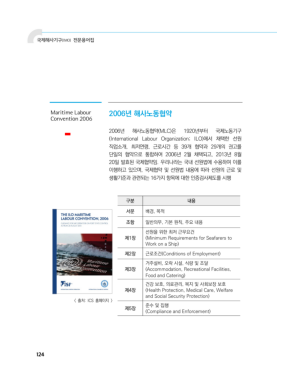

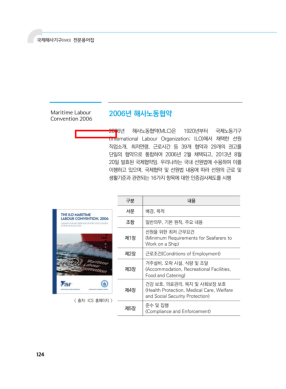

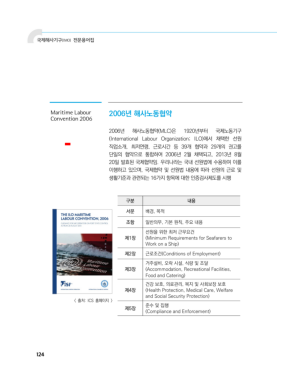

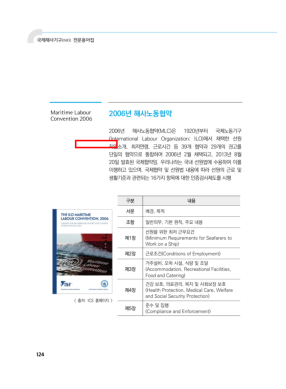

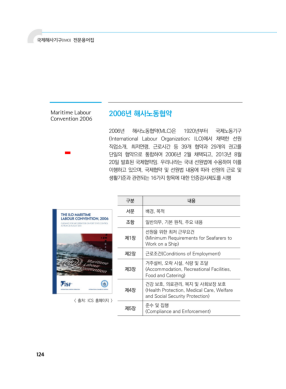

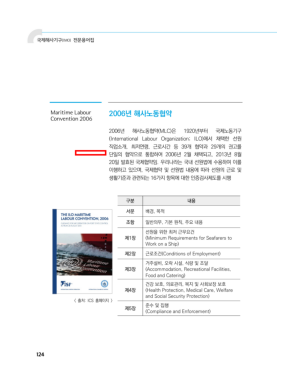

In [60]:
process_draw_box(img, auto_elements)

### fast 방법 - 이미지 파일은 지원 안함

In [68]:
fast_elements = partition(
    filename=file_path, 
    strategy="fast",
    languages=['kor', 'eng'])

print(len(fast_elements))

22


### hi-res 방법

In [79]:
# 읽을 수 있는 바이너리 파일로 전환
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='PNG')
img_byte_arr.seek(0)

hi_res_elements_img = partition(
    file=img_byte_arr, 
    strategy="hi_res",
    languages=['kor', 'eng'])

print(len(hi_res_elements_img))

6


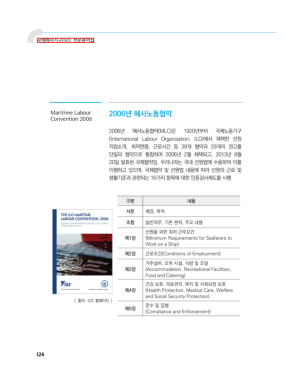

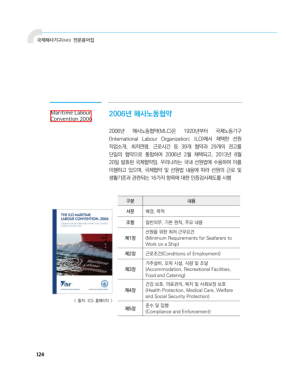

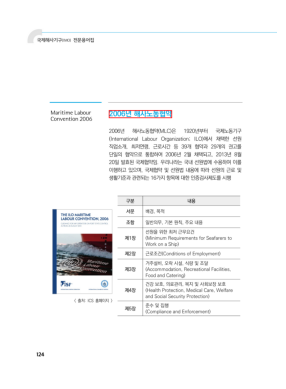

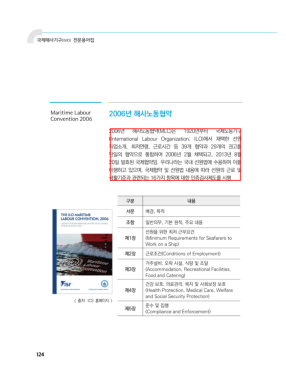

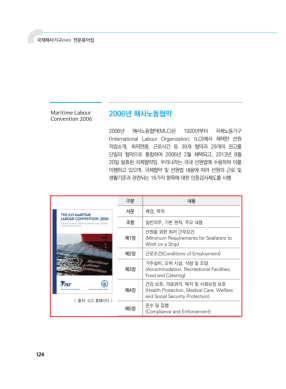

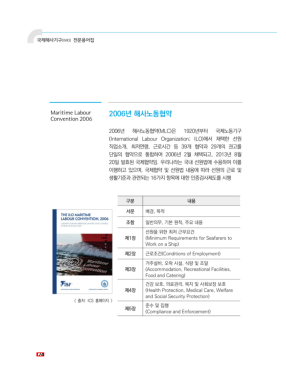

In [80]:
process_draw_box(img, hi_res_elements_img)

In [77]:
ocr_only_elements_pdf = partition(
    filename=file_path, 
    strategy="hi_res",
    languages=['kor', 'eng'])

print(len(ocr_only_elements_pdf))

12


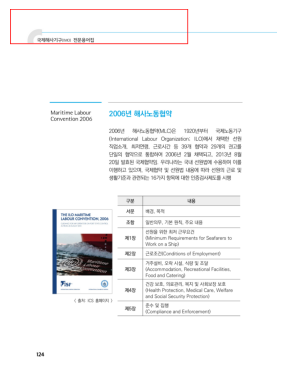

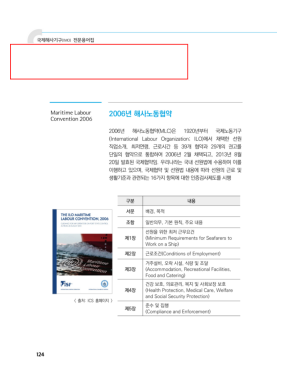

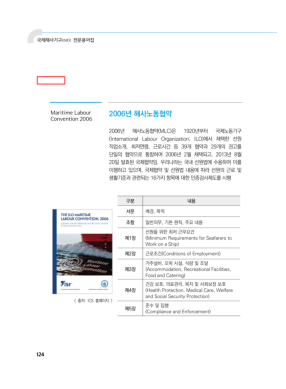

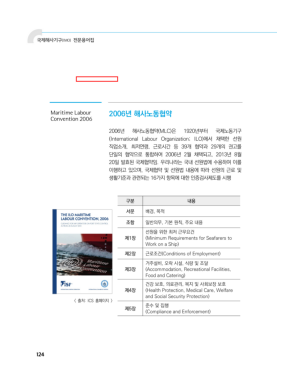

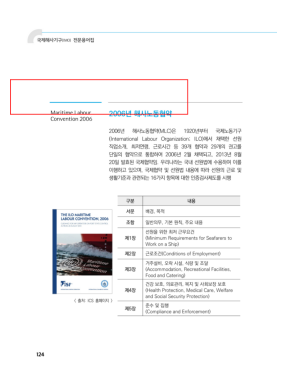

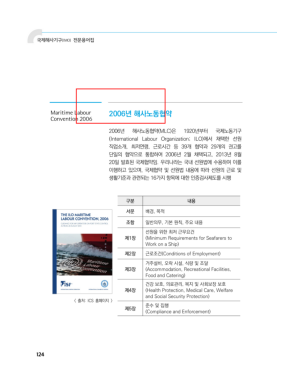

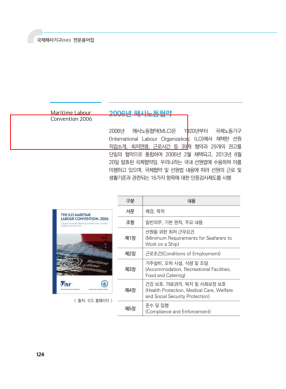

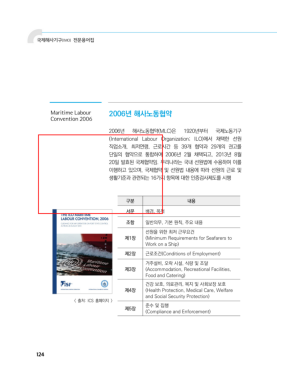

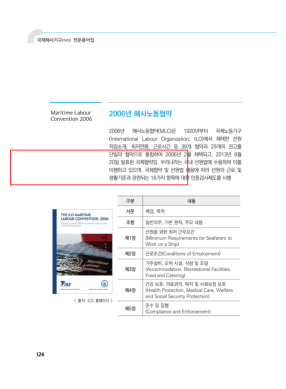

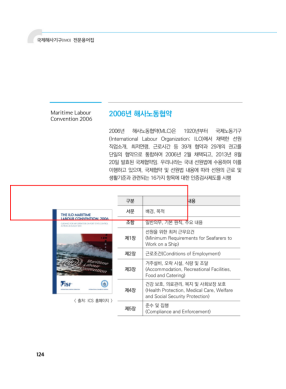

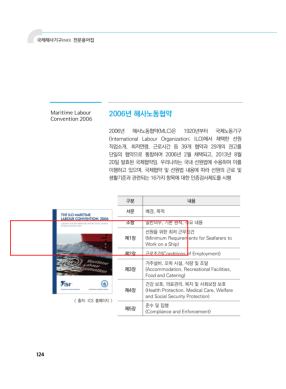

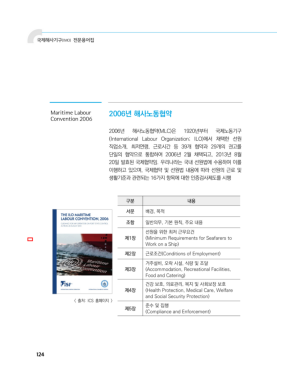

In [78]:
process_draw_box(img, ocr_only_elements_pdf)

### OCR-only 방법

In [73]:
ocr_only_elements = partition(
    file=img_byte_arr, 
    strategy="ocr_only",
    languages=['kor', 'eng'])

print(len(ocr_only_elements))

15


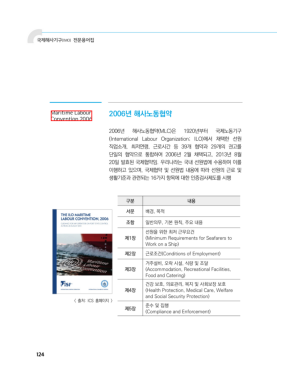

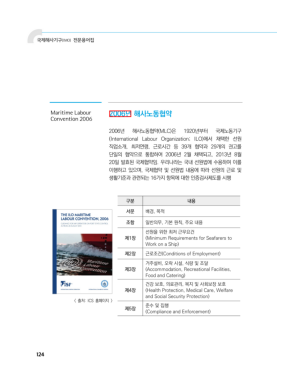

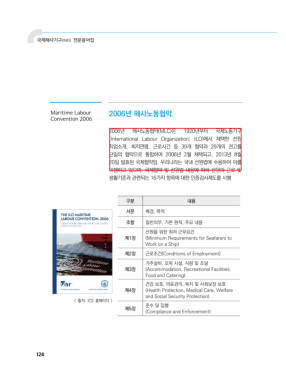

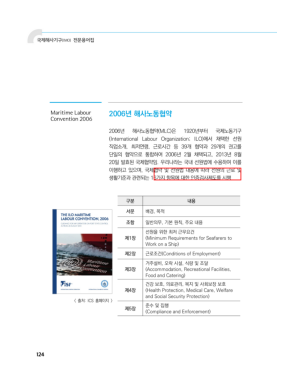

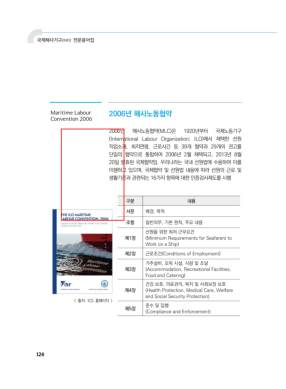

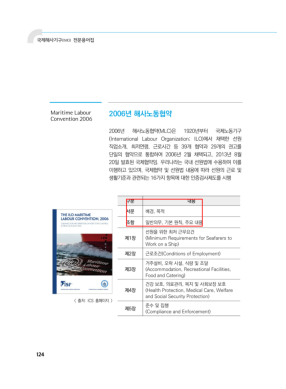

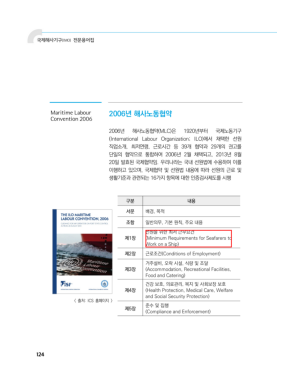

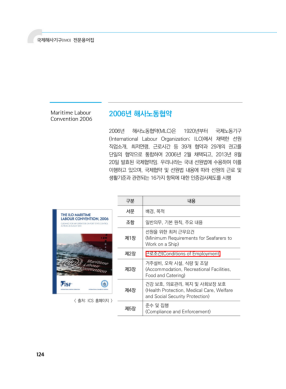

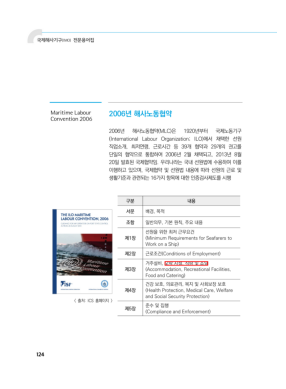

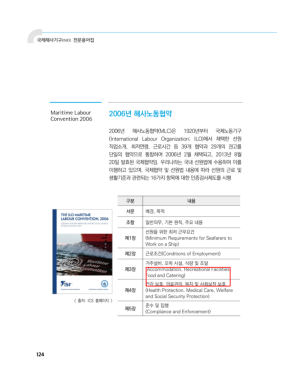

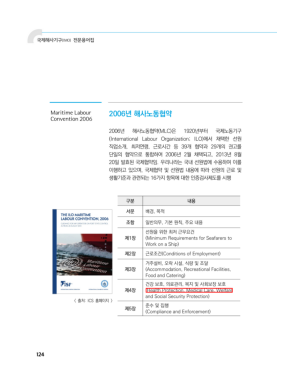

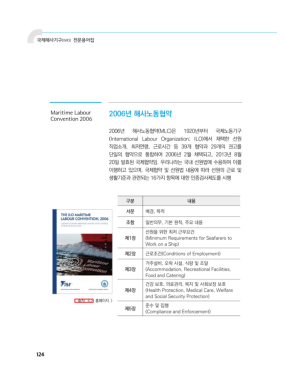

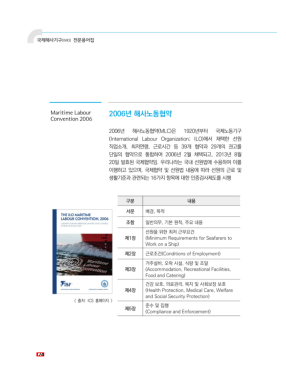

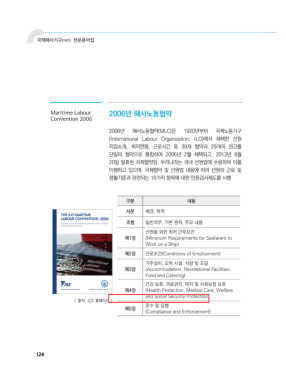

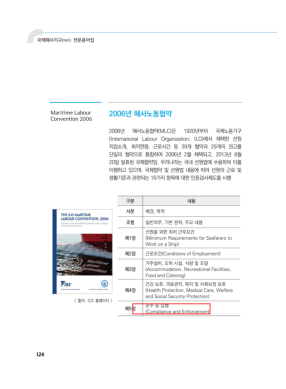

In [74]:
process_draw_box(img, ocr_only_elements)

출처
Unstructured 공식문서: https://docs.unstructured.io/open-source/core-functionality/partitioning#partition-pdf
